In [4]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from arch import arch_model

%matplotlib inline


In [4]:
sp500_data = pd.read_csv("HistoricalPrices.csv")
nsei_data = pd.read_csv("NSEI (3).csv")
n225_data = pd.read_csv("N225 (1).csv")
hsi_data = pd.read_csv("HSI.csv")


In [5]:
sp500_data['Percentage_Change_sp500_data'] = ((sp500_data[' Close'] - sp500_data[' Close'].shift(1)) / sp500_data[' Close'].shift(1)) * 100
nsei_data['Percentage_Change_nifty_data'] = ((nsei_data['Close'] - nsei_data['Close'].shift(1)) / nsei_data['Close'].shift(1)) * 100
n225_data['Percentage_Change_nikkei_data'] = ((n225_data['Close'] - n225_data['Close'].shift(1)) / n225_data['Close'].shift(1)) * 100
hsi_data['Percentage_Change_hsi_data'] = ((hsi_data['Close'] - hsi_data['Close'].shift(1)) / hsi_data['Close'].shift(1)) * 100

In [6]:
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
nsei_data['Date'] = pd.to_datetime(nsei_data['Date'])
n225_data['Date'] = pd.to_datetime(n225_data['Date'])
hsi_data['Date'] = pd.to_datetime(hsi_data['Date'])

In [7]:
sp500_data = sp500_data.rename(columns={" Close": "sp500_close"})

In [8]:
n225_data = n225_data.rename(columns={"Close": "n225_close"})

In [9]:
nsei_data = nsei_data.rename(columns={"Close": "nsei_close"})

In [10]:
hsi_data = hsi_data.rename(columns={"Close": "hsi_close"})

In [11]:
columns = [' Open',' High',' Low']
columns1 = ['Open','High','Low','Adj Close','Volume']

In [12]:
nsei_data.drop(columns=columns1, inplace=True)
sp500_data.drop(columns=columns, inplace=True)
n225_data.drop(columns=columns1, inplace=True)
hsi_data.drop(columns=columns1, inplace=True)

In [13]:
nsei_data.dropna(inplace=True)
sp500_data.dropna(inplace=True)
n225_data.dropna(inplace=True)
hsi_data.dropna(inplace=True)

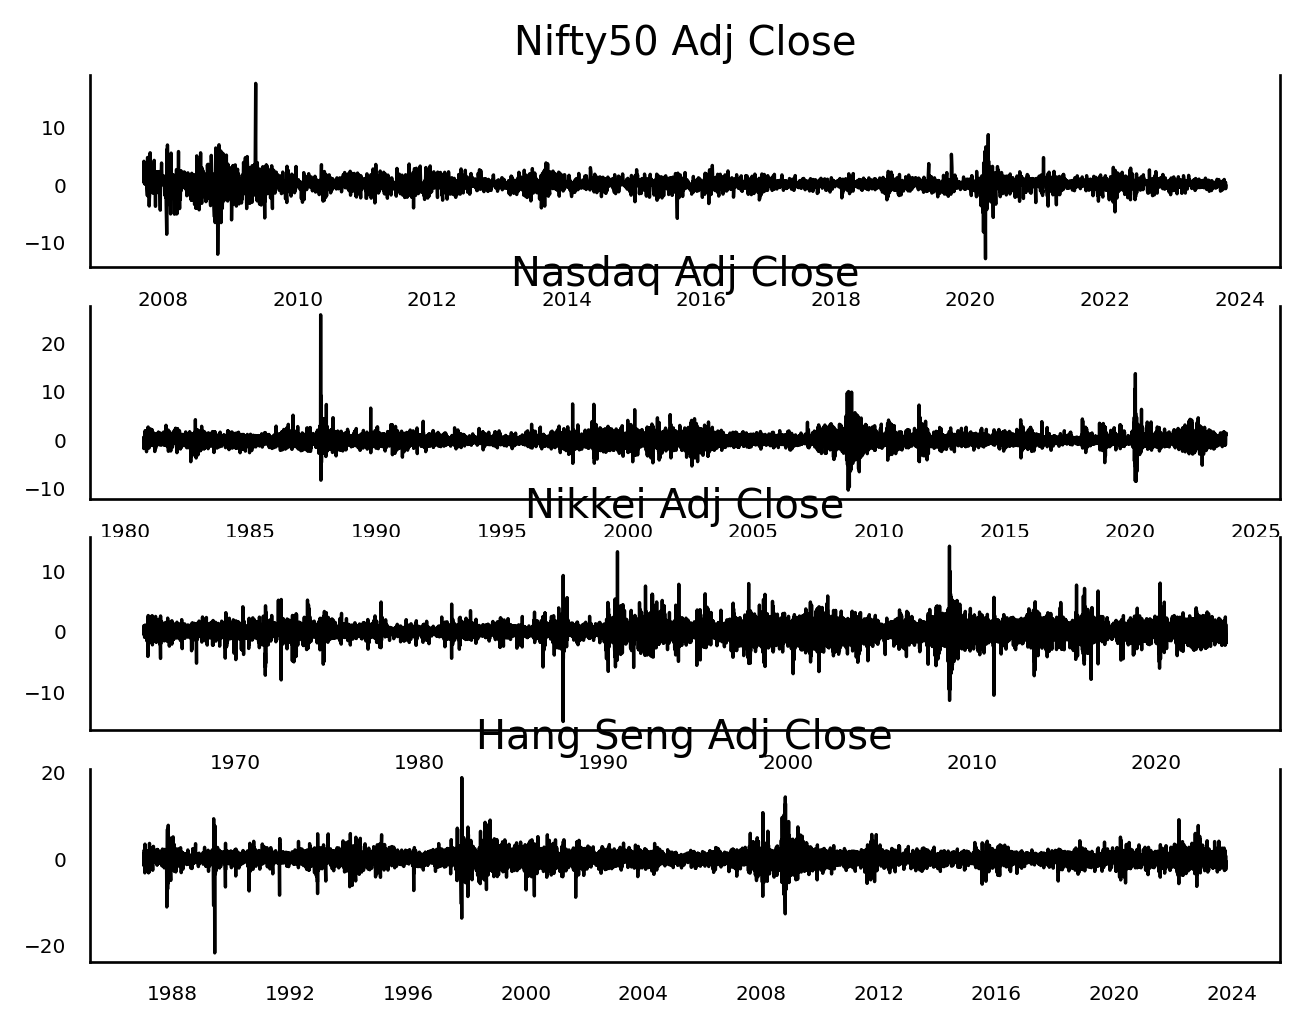

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, dpi=240)

ax1.plot(nsei_data['Date'],nsei_data['Percentage_Change_nifty_data'], color='black', linewidth=1)
ax1.set_title('Nifty50 Adj Close')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)

ax2.plot(sp500_data['Date'],sp500_data['Percentage_Change_sp500_data'], color='black', linewidth=1)
ax2.set_title('Nasdaq Adj Close')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.spines['top'].set_alpha(0)
ax2.tick_params(labelsize=6)

ax3.plot(n225_data['Date'],n225_data['Percentage_Change_nikkei_data'], color='black', linewidth=1)
ax3.set_title('Nikkei Adj Close')
ax3.xaxis.set_ticks_position('none')
ax3.yaxis.set_ticks_position('none')
ax3.spines['top'].set_alpha(0)
ax3.tick_params(labelsize=6)

ax4.plot(hsi_data['Date'],hsi_data['Percentage_Change_hsi_data'], color='black', linewidth=1)
ax4.set_title('Hang Seng Adj Close')
ax4.xaxis.set_ticks_position('none')
ax4.yaxis.set_ticks_position('none')
ax4.spines['top'].set_alpha(0)
ax4.tick_params(labelsize=6)

In [15]:
df = pd.merge(nsei_data, sp500_data, on='Date', how='inner')
df = pd.merge(df, n225_data, on='Date', how='inner')
df = pd.merge(df, hsi_data, on='Date', how='inner')
df

,Date,nsei_close,Percentage_Change_nifty_data,sp500_close,Percentage_Change_sp500_data,n225_close,Percentage_Change_nikkei_data,hsi_close,Percentage_Change_hsi_data
0,2007-09-18,4546.200195,1.146926,1519.78,-0.604959,15801.799805,-2.019047,24576.849609,-0.091426
1,2007-09-19,4732.350098,4.094626,1529.03,0.676872,16381.540039,3.668824,25554.640625,3.978504
2,2007-09-20,4747.549805,0.321187,1518.75,-0.458791,16413.789063,0.196862,25701.130859,0.573243
3,2007-09-21,4837.549805,1.895715,1525.75,0.528421,16312.610352,-0.616425,25843.779297,0.555028
4,2007-09-25,4938.850098,0.134826,1517.21,-0.538212,16401.730469,0.546327,26430.289063,-0.458160
...,...,...,...,...,...,...,...,...,...
3392,2023-10-13,19751.050781,-0.216981,4327.78,-1.048328,32315.990234,-0.549844,17813.449219,-2.328966
3393,2023-10-16,19731.750000,-0.097720,4373.63,0.009833,31659.029297,-2.032928,17640.359375,-0.971681
3394,2023-10-17,19811.500000,0.404171,4373.20,1.358179,32040.289063,1.204269,17773.339844,0.753842
3395,2023-10-18,19671.099609,-0.708681,4314.60,0.855540,32042.250000,0.006120,17732.519531,-0.229672


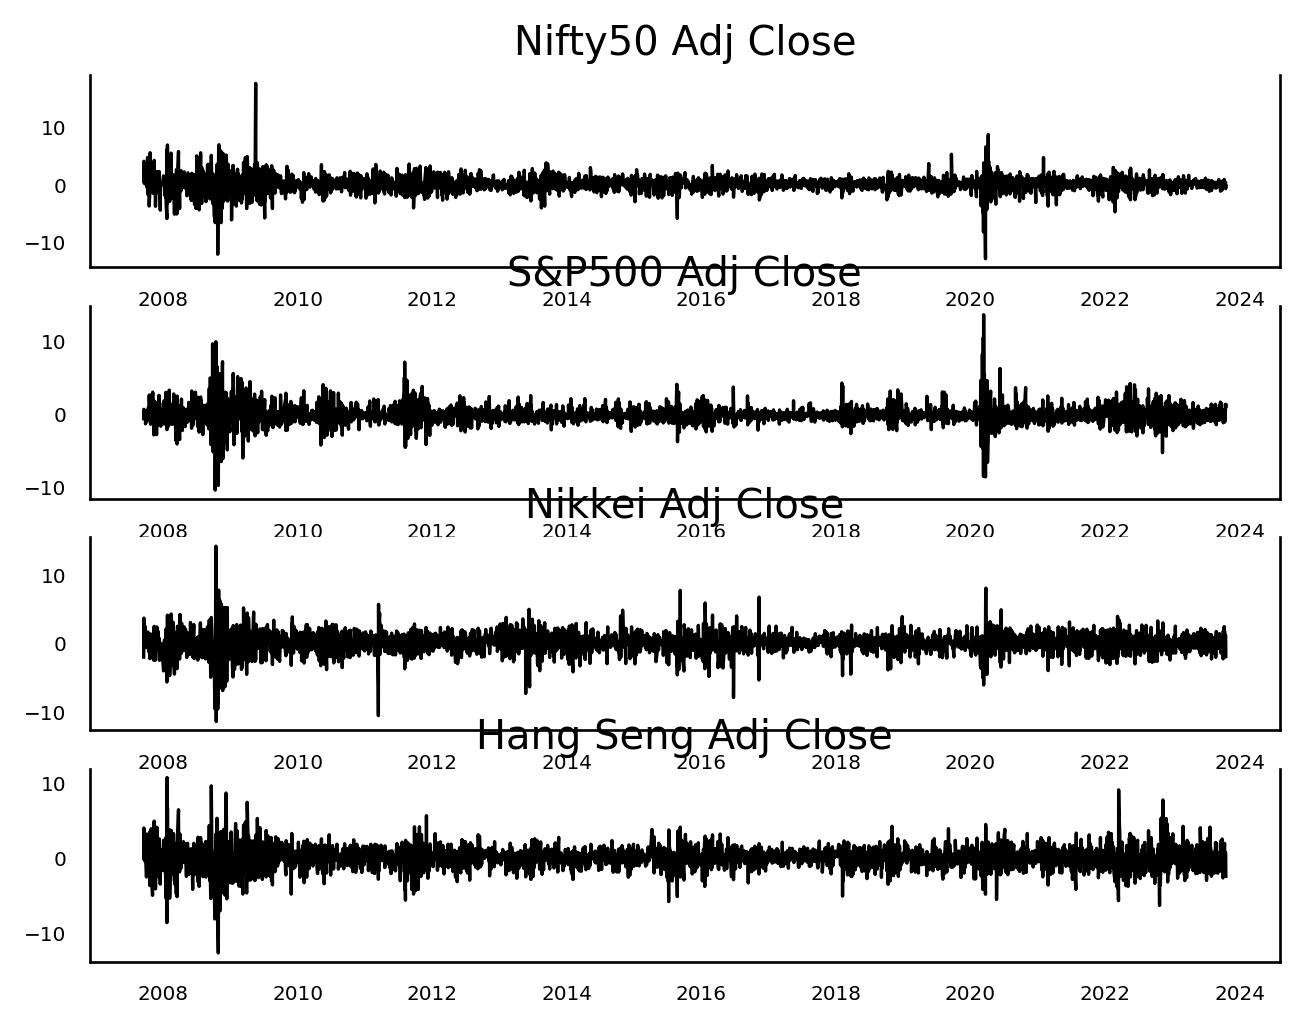

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, dpi=240)

ax1.plot(df['Date'],df['Percentage_Change_nifty_data'], color='black', linewidth=1)
ax1.set_title('Nifty50 Adj Close')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)

ax2.plot(df['Date'],df['Percentage_Change_sp500_data'], color='black', linewidth=1)
ax2.set_title('S&P500 Adj Close')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.spines['top'].set_alpha(0)
ax2.tick_params(labelsize=6)

ax3.plot(df['Date'],df['Percentage_Change_nikkei_data'], color='black', linewidth=1)
ax3.set_title('Nikkei Adj Close')
ax3.xaxis.set_ticks_position('none')
ax3.yaxis.set_ticks_position('none')
ax3.spines['top'].set_alpha(0)
ax3.tick_params(labelsize=6)

ax4.plot(df['Date'],df['Percentage_Change_hsi_data'], color='black', linewidth=1)
ax4.set_title('Hang Seng Adj Close')
ax4.xaxis.set_ticks_position('none')
ax4.yaxis.set_ticks_position('none')
ax4.spines['top'].set_alpha(0)
ax4.tick_params(labelsize=6)


In [17]:
ad_fuller_result_1 = adfuller(df['Percentage_Change_nifty_data'])

print('Percentage_Change_nifty_data')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['Percentage_Change_sp500_data'])

print('Percentage_Change_sp500_data')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3 = adfuller(df['Percentage_Change_nikkei_data'])

print('Percentage_Change_nikkei_data')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3 = adfuller(df['Percentage_Change_hsi_data'])

print('Percentage_Change_hsi_data')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Percentage_Change_nifty_data
ADF Statistic: -20.61462599679937
p-value: 0.0

---------------------

Percentage_Change_sp500_data
ADF Statistic: -13.10415298212621
p-value: 1.685970597925676e-24

---------------------

Percentage_Change_nikkei_data
ADF Statistic: -13.10415298212621
p-value: 1.685970597925676e-24

---------------------

Percentage_Change_hsi_data
ADF Statistic: -13.10415298212621
p-value: 1.685970597925676e-24


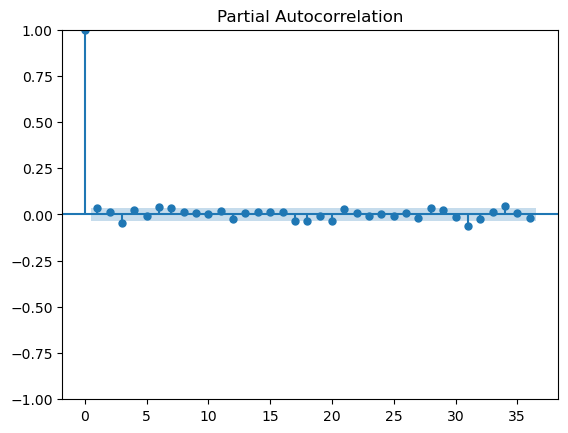

In [18]:
plot_pacf(df['Percentage_Change_nifty_data']);

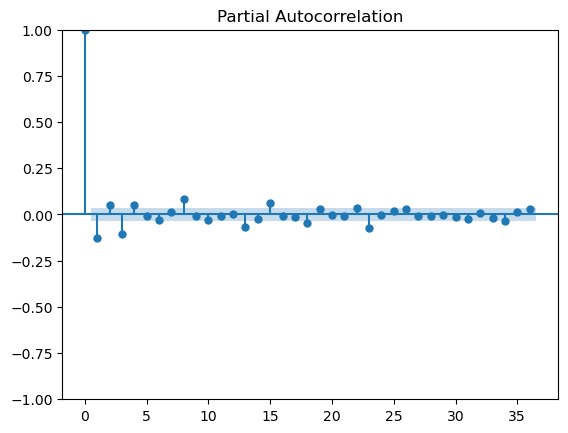

In [19]:
plot_pacf(df['Percentage_Change_sp500_data']);

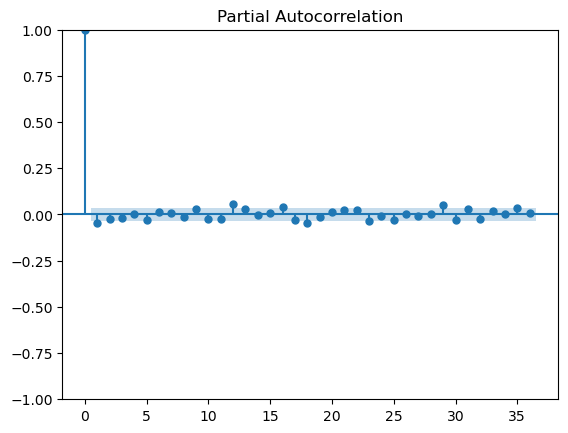

In [20]:
plot_pacf(df['Percentage_Change_nikkei_data']);

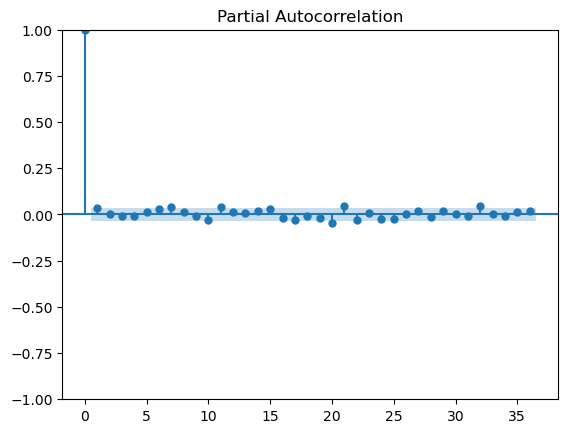

In [21]:
plot_pacf(df['Percentage_Change_hsi_data']);

In [22]:
model_garch_1_1 = arch_model(df['Percentage_Change_nifty_data'], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 5195.45368812071
Iteration:     10,   Func. Count:     62,   Neg. LLF: 5082.555817711076
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5082.555656929052
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Constant Mean - GARCH Model Results                           
========================================================================================
Dep. Variable:     Percentage_Change_nifty_data   R-squared:                       0.000
Mean Model:                       Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                GARCH   Log-Likelihood:               -5082.56
Distribution:                            Normal   AIC:                           10173.1
Method:                      Maximum Likelihood   BIC:                           10197.6
                                                  No. Observations:                 3397
Date:                          Fri, Nov 15 2024   Df Residuals:                     3396
Time:                                  19:42:32   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0750  1.630e-02      4.603  4.161e-06 [4.308e-02,  0.107]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0160  5.902e-03      2.706  6.802e-03 [4.406e-03,2.754e-02]
alpha[1]       0.1019  1.580e-02      6.448  1.133e-10   [7.093e-02,  0.133]
beta[1]        0.8922  1.500e-02     59.489      0.000     [  0.863,  0.922]
============================================================================

Covariance estimator: robust
"""

In [23]:
volatility = results_garch_1_1.conditional_volatility
volatility_df = volatility.to_frame()
volatility_df.columns = ['Volatility_of_nifty']

In [24]:
df['Volatility_of_nifty'] = volatility_df['Volatility_of_nifty'] 

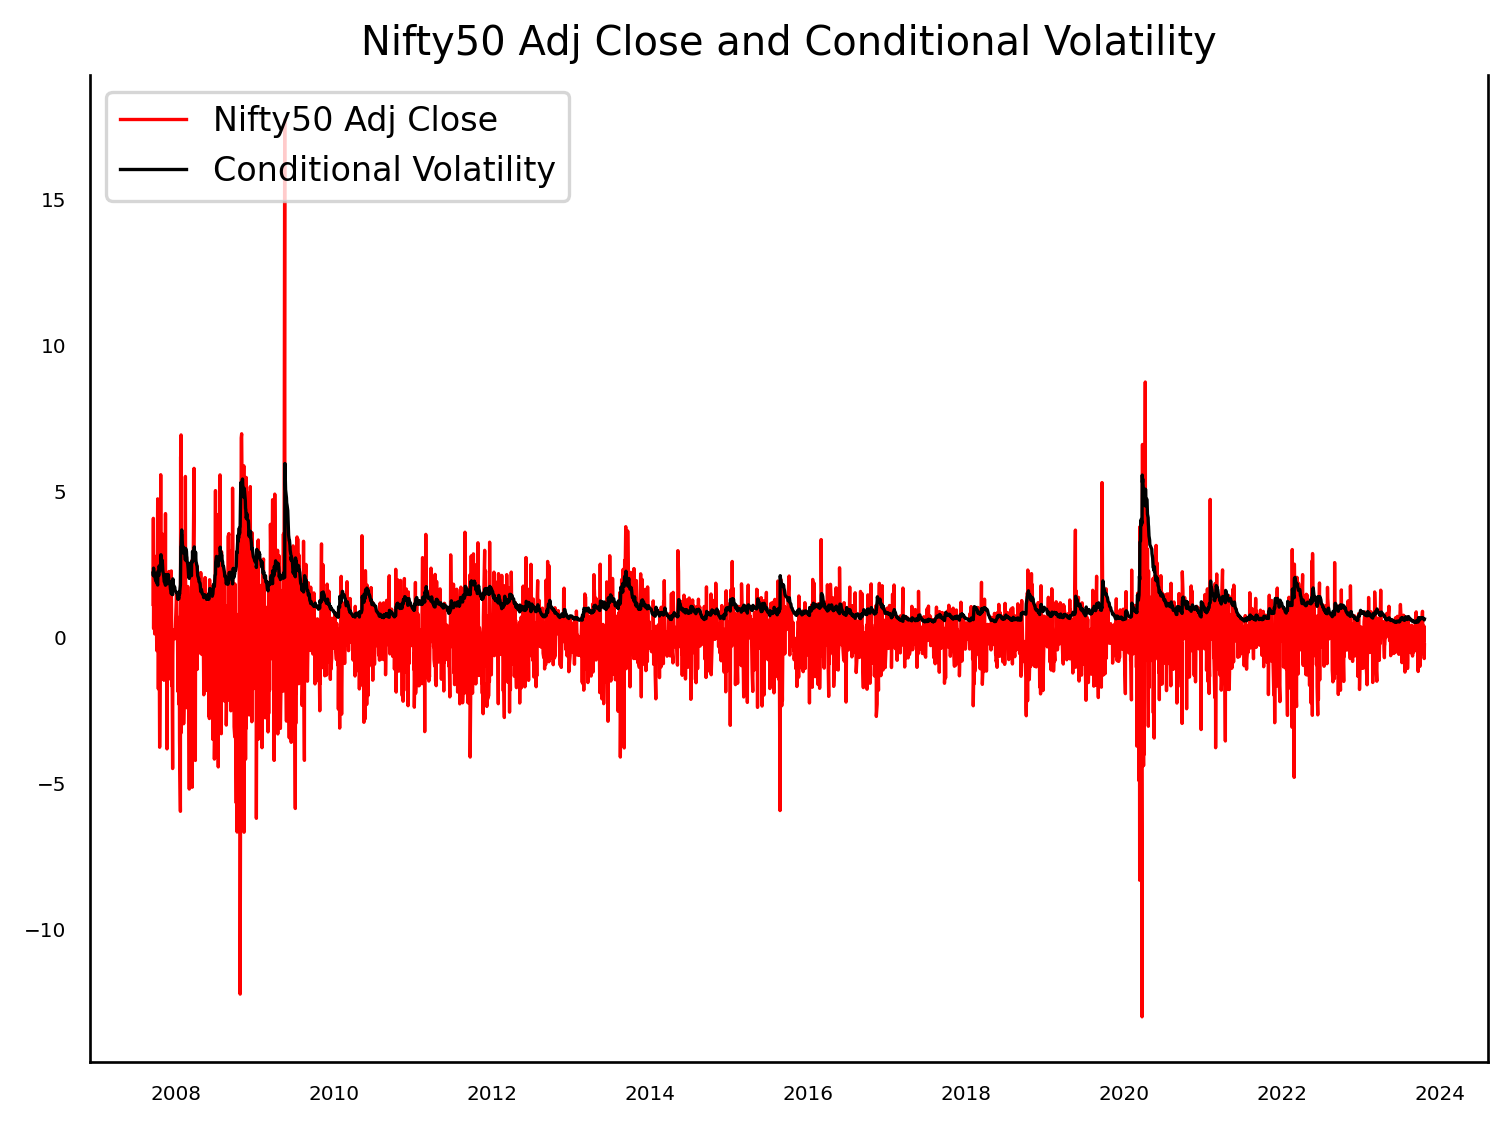

In [25]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, dpi=240)
ax1.plot(df['Date'], df['Percentage_Change_nifty_data'], color='red', label='Nifty50 Adj Close', linewidth=1)
ax1.plot(df['Date'], df['Volatility_of_nifty'], color='black', label='Conditional Volatility', linewidth=1)
ax1.set_title('Nifty50 Adj Close and Conditional Volatility')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)
ax1.legend(loc='upper left')  
plt.tight_layout()
plt.show()

In [26]:
model_garch_1_1 = arch_model(df['Percentage_Change_sp500_data'], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 54658.27401408844
Iteration:     10,   Func. Count:     66,   Neg. LLF: 4717.237284419944
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4717.2372844198635
            Iterations: 10
            Function evaluations: 66
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Constant Mean - GARCH Model Results                           
========================================================================================
Dep. Variable:     Percentage_Change_sp500_data   R-squared:                       0.000
Mean Model:                       Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                GARCH   Log-Likelihood:               -4717.24
Distribution:                            Normal   AIC:                           9442.47
Method:                      Maximum Likelihood   BIC:                           9467.00
                                                  No. Observations:                 3397
Date:                          Fri, Nov 15 2024   Df Residuals:                     3396
Time:                                  19:42:41   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu            -0.0789  1.399e-02     -5.640  1.704e-08 [ -0.106,-5.148e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0370  8.073e-03      4.582  4.608e-06 [2.117e-02,5.281e-02]
alpha[1]       0.1787  2.419e-02      7.387  1.503e-13     [  0.131,  0.226]
beta[1]        0.8021  2.210e-02     36.294 1.993e-288     [  0.759,  0.845]
============================================================================

Covariance estimator: robust
"""

In [27]:
volatility = results_garch_1_1.conditional_volatility
volatility_df = volatility.to_frame()
volatility_df.columns = ['Volatility_of_sp500']

In [28]:
df['Volatility_of_sp500'] = volatility_df['Volatility_of_sp500']

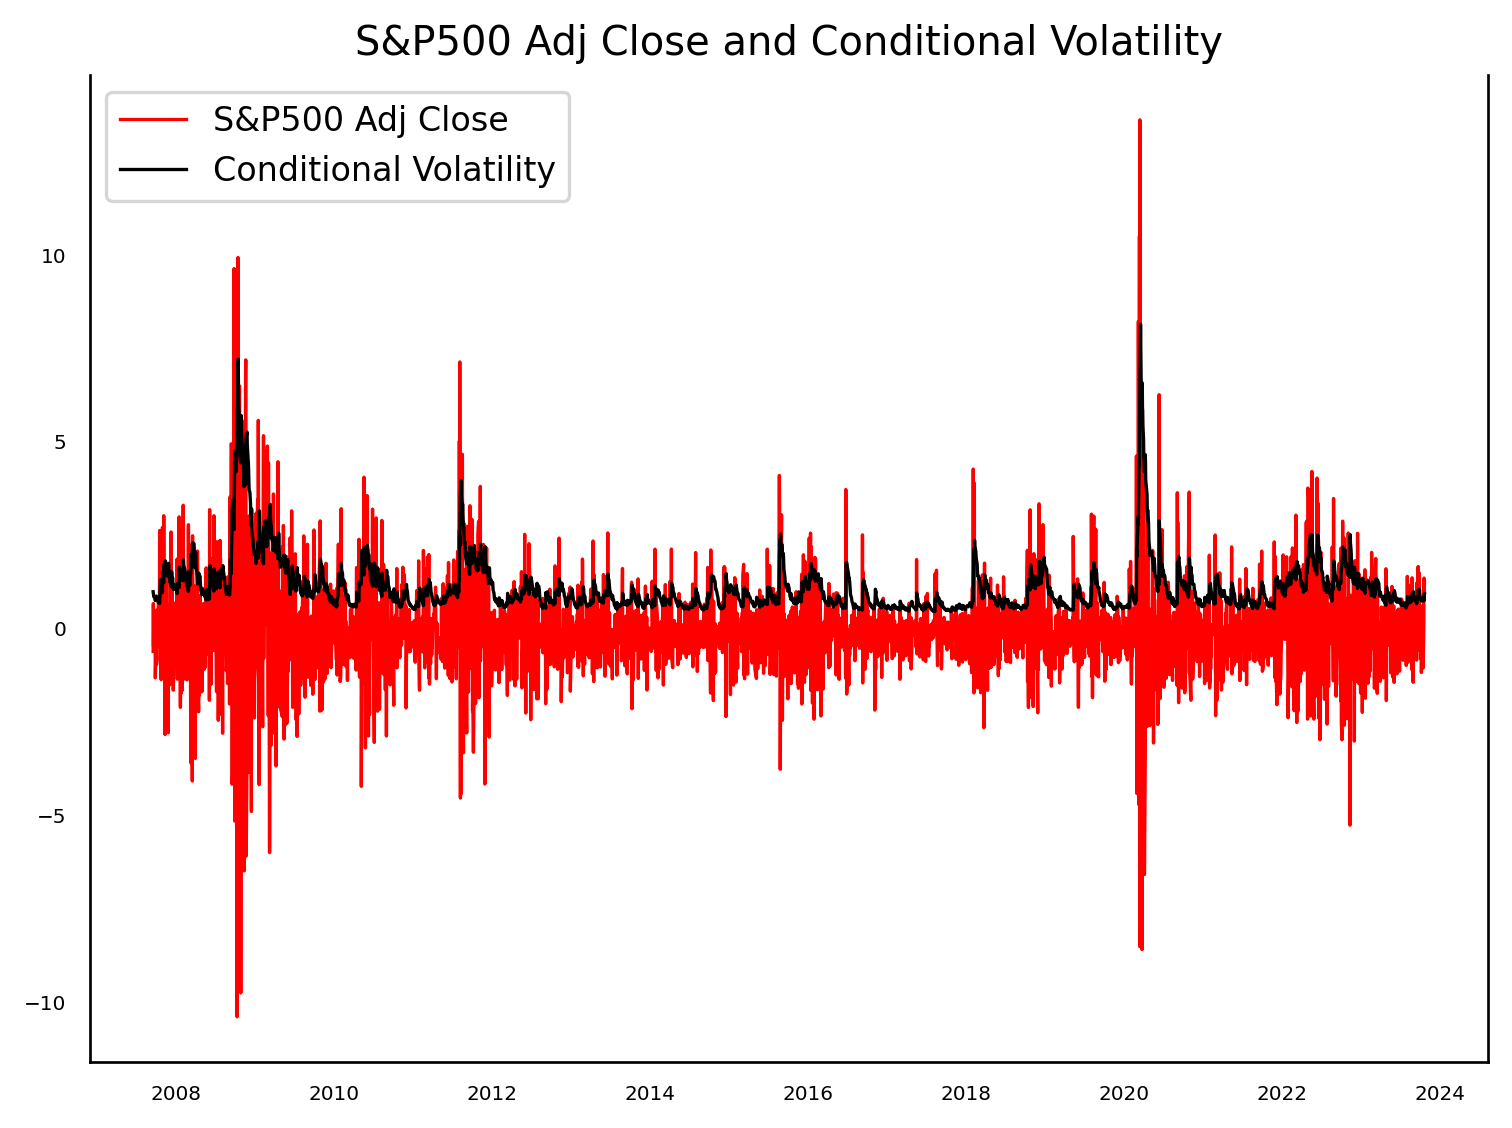

In [29]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, dpi=240)
ax1.plot(df['Date'], df['Percentage_Change_sp500_data'], color='red', label='S&P500 Adj Close', linewidth=1)
ax1.plot(df['Date'], df['Volatility_of_sp500'], color='black', label='Conditional Volatility', linewidth=1)
ax1.set_title('S&P500 Adj Close and Conditional Volatility')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)
ax1.legend(loc='upper left')  
plt.tight_layout()
plt.show()

In [30]:
model_garch_1_1 = arch_model(df['Percentage_Change_nikkei_data'], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()


Iteration:      5,   Func. Count:     39,   Neg. LLF: 5687.200789178415
Iteration:     10,   Func. Count:     66,   Neg. LLF: 5682.720774836304
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5682.720774836304
            Iterations: 11
            Function evaluations: 70
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:     Percentage_Change_nikkei_data   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -5682.72
Distribution:                             Normal   AIC:                           11373.4
Method:                       Maximum Likelihood   BIC:                           11398.0
                                                   No. Observations:                 3397
Date:                           Fri, Nov 15 2024   Df Residuals:                     3396
Time:                                   19:42:47   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0567  1.989e-02      2.849  4.386e-03 [1.768e-02,9.565e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0754  1.963e-02      3.842  1.222e-04 [3.695e-02,  0.114]
alpha[1]       0.1343  2.090e-02      6.426  1.310e-10 [9.334e-02,  0.175]
beta[1]        0.8313  2.537e-02     32.762 2.078e-235   [  0.782,  0.881]
==========================================================================

Covariance estimator: robust
"""

In [31]:
volatility = results_garch_1_1.conditional_volatilit
volatility_df = volatility.to_frame()
volatility_df.columns = ['Volatility_of_nikkei']
df['Volatility_of_nikkei'] = volatility_df['Volatility_of_nikkei']

AttributeError: 'ARCHModelResult' object has no attribute 'conditional_volatilit'

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, dpi=240)
ax1.plot(df['Date'], df['Percentage_Change_nikkei_data'], color='red', label='Nikkei Adj Close', linewidth=1)
ax1.plot(df['Date'], df['Volatility_of_nikkei'], color='black', label='Conditional Volatility', linewidth=1)
ax1.set_title('Nikkei225 Adj Close and Conditional Volatility')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)
ax1.legend(loc='upper left')  
plt.tight_layout()
plt.show()

In [32]:
model_garch_1_1 = arch_model(df['Percentage_Change_hsi_data'], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 7869.916289072144
Iteration:     10,   Func. Count:     64,   Neg. LLF: 5706.587342891669
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5706.587339099586
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GARCH Model Results                          
======================================================================================
Dep. Variable:     Percentage_Change_hsi_data   R-squared:                       0.000
Mean Model:                     Constant Mean   Adj. R-squared:                  0.000
Vol Model:                              GARCH   Log-Likelihood:               -5706.59
Distribution:                          Normal   AIC:                           11421.2
Method:                    Maximum Likelihood   BIC:                           11445.7
                                                No. Observations:                 3397
Date:                        Fri, Nov 15 2024   Df Residuals:                     3396
Time:                                19:42:50   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0253  2.016e-02      1.254      0.210 [-1.424e-02,6.478e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0251  8.822e-03      2.842  4.484e-03 [7.781e-03,4.236e-02]
alpha[1]       0.0729  1.237e-02      5.887  3.925e-09 [4.860e-02,9.711e-02]
beta[1]        0.9153  1.448e-02     63.222      0.000     [  0.887,  0.944]
============================================================================

Covariance estimator: robust
"""

In [33]:
volatility = results_garch_1_1.conditional_volatility
volatility_df = volatility.to_frame()
volatility_df.columns = ['Volatility_of_hsi']

In [39]:
df['Volatility_of_hsi'] = volatility_df['Volatility_of_hsi']

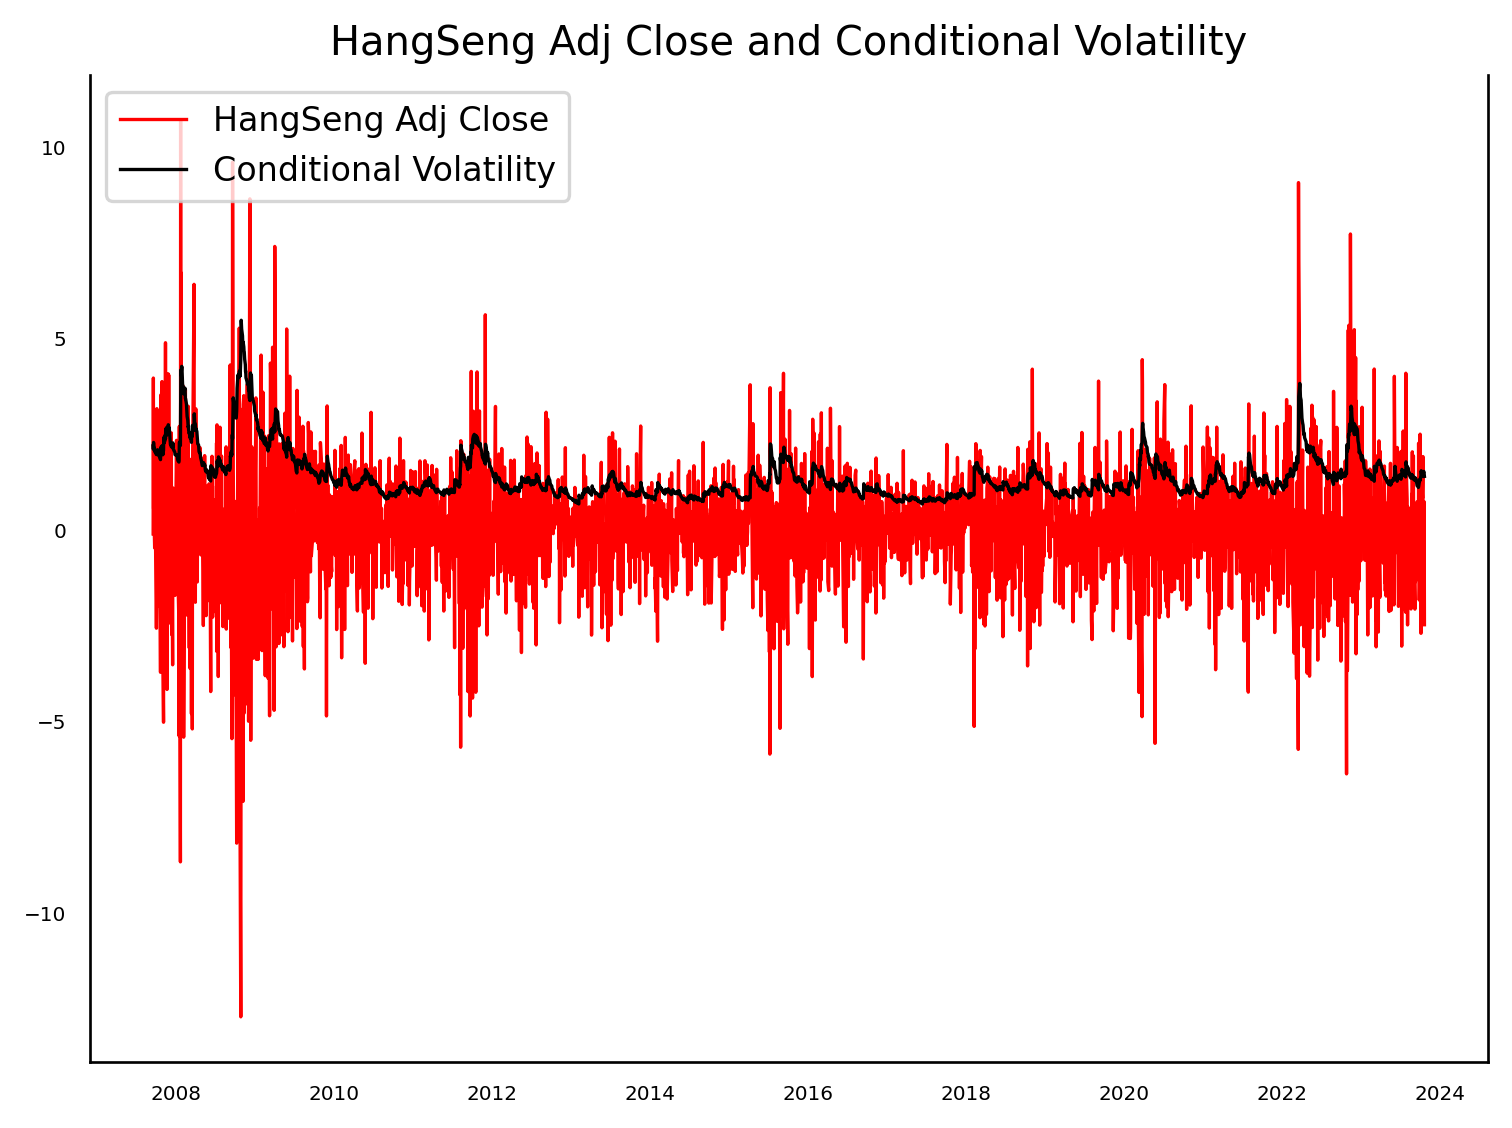

In [40]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, dpi=240)
ax1.plot(df['Date'], df['Percentage_Change_hsi_data'], color='red', label='HangSeng Adj Close', linewidth=1)
ax1.plot(df['Date'], df['Volatility_of_hsi'], color='black', label='Conditional Volatility', linewidth=1)
ax1.set_title('HangSeng Adj Close and Conditional Volatility')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)
ax1.legend(loc='upper left') 
plt.tight_layout()
plt.show()

In [3]:
df["voliality of the given",nrows=1,ncols=56,labedlsize=34]
ax1.plot(df['Time':'hh:mm:ss',is True=1])
ax1.plot.show()
plt.show()
ax2.az(loc='lower left')
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (1357577076.py, line 1)